In [1]:
"""
Problem 1.2

Using N=20, sigma_squared_noise = 0.1 apply regression using the Least Squares 
method and a 2nd degree polynomial. Perform 100 experiments using different 
noise samples for each experiment. For each point of the training set, calculate 
the mean and variance of y over the 100 experiments and plot these quantities 
on the (x,y) plane along with the curve obtained by the true model. 
Repeat using a 10th degree polynomial. Compare your results obtained for the 2 
different cases (2nd versus 10th degree polynomial) making special reference to 
the bias-variance dilemma. 

The true components of the training vector: [0.2, -1, 0.9, 0.7, 0, -0.2]
The noise is white Gaussia, mean=0

"""
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
from functions_problems_1a import *

In [2]:
"""
Predetermined parameters of the problem
"""
#True thetas
thetas = np.array([0.2, -1, 0.9, 0.7, 0, -0.2])

#True Degrees of the polynomial model
true_degrees_pol = 5

#Interval
lower_bound = 0
upper_bound = 2

#Total number of values from the interval
N = 20

In [3]:
"""
Create a true model without noise
"""
#Create the training set
X = np.linspace(lower_bound, upper_bound, N)

#Create the polynomial matrix for X and add a column of ones
X_pol = X
for i in range(2,true_degrees_pol+1):
    X_pol = np.c_[X_pol, X**(i)]    #add the 5 polynomial degrees of each xi 
Phi_true = np.c_[np.ones((N,1)), X_pol]  #add x0 = 1 to each instance

y_train = y_vector(thetas, Phi_true)


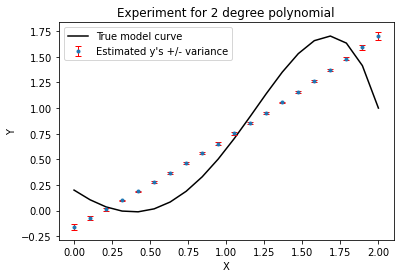

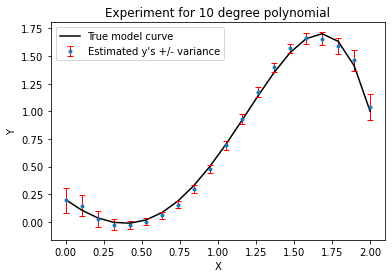

<Figure size 432x288 with 0 Axes>

In [4]:
"""
Create the 2nd and 10th degree polynomial training sets
"""
for degrees_pol in [2, 10]:
    #Create the second/tenth degree polynomial matrix for X and add a column of ones
    X_pol = X
    for i in range(2,degrees_pol+1):
        X_pol = np.c_[X_pol, X**(i)]    #add the 2/10 polynomial degrees of each xi 
    Phi_train = np.c_[np.ones((N,1)), X_pol]  #add x0 = 1 to each instance

    #Calculate thetas for the second degree polynomial
    theta = least_squares(Phi_train, y_train)

    #Predict the ys with the new thetas
    y_train_LS = y_vector(theta, Phi_train)

    #100 experiments
    num_experiments = 100
    #Noise standard deviation
    sigma_htta = 0.1**0.5
    #Noise mean 
    mu = 0


    #Initiate the matrix
    y_train_matrix_LS = np.array([])

    for i in range(num_experiments):
        #Creatre a noise vector
        noise_vector_2 = noise(mu, sigma_htta, N)
       
        #Add the noise vector on our y vector
        y_train_LS = np.add(y_train_LS,noise_vector_2)

        #Append the y vector to the matrix
        if len(y_train_matrix_LS) == 0:
            y_train_matrix_LS = y_train_LS
        else:
            y_train_matrix_LS = np.vstack([y_train_matrix_LS, y_train_LS])
    
        y_train_LS = y_vector(theta, Phi_train)

    # Least Squares: Calculate the best thetas using the training set
    theta_LS = np.array([])
    for experiment in y_train_matrix_LS:
        theta_train_2 = least_squares(Phi_train, experiment)
        if len(theta_LS) == 0:
            theta_LS = theta_train_2
        else:
           theta_LS = np.vstack([theta_LS, theta_train_2])

    #Find the predicted ys using the new thetas
    y_train_LS = np.array([])

    for param_vector in theta_LS:
        y_train_LS_i = y_vector(param_vector, Phi_train)


    
        if len(y_train_LS) == 0:
            y_train_LS = y_train_LS_i
        else:
            y_train_LS = np.vstack([y_train_LS, y_train_LS_i])

    #Calculate the mean and the variance of each y
    y_train_mu = np.mean(y_train_LS, axis = 0)
    y_train_var = np.var(y_train_LS, axis = 0)

    #Create a plot of the estimates (blue dots) and their errors (red error bars) against the true model curve (green line)
    plt.plot(X, y_train, 'k-', label="True model curve")
    plt.errorbar(X, y_train_mu, y_train_var, linestyle='None', marker='.', elinewidth=1, 
                 capsize=3, ecolor = "r", label= "Estimated y's +/- variance")
    plt.title("Experiment for " +  str(degrees_pol) + " degree polynomial")
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()
    plt.savefig("1_2_" + str(degrees_pol) + "degrees.png")